IMPORATATION  DES LIBRAIRIE

In [52]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

importation  du  jeu de données

In [27]:
df = pd.read_csv('../Data/flights.csv') 

C:\Users\23769\AppData\Local\Temp\ipykernel_7112\3227146296.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/flights.csv')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [29]:
df.describe()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [30]:
def data_info(data):
    info_dict = {


    'nombre de valeurs non null': data.count().tolist(), # contage des valeurs non nulles de chaque colonne   de notre dataframe
    'nombre de valeurs null': data.shape[0] -data.count(),

    'type': data.dtypes.tolist(), # affiche le type de chaque colonne

    '% de valeurs Null' : ( data.shape[0] - data.count()) * 100 /  data.shape[0] ,# Calcul du pourcentage de valeurs nulles

    'valeurs uniques' : data.nunique().tolist(),# affiche le nombre de valeurs uniques de chaque colonne

    }
    return pd.DataFrame(info_dict)

In [31]:
data_info(df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5819079,0,int64,0.000000,1
MONTH,5819079,0,int64,0.000000,12
DAY,5819079,0,int64,0.000000,31
DAY_OF_WEEK,5819079,0,int64,0.000000,7
AIRLINE,5819079,0,object,0.000000,14
FLIGHT_NUMBER,5819079,0,int64,0.000000,6952
TAIL_NUMBER,5804358,14721,object,0.252978,4897
ORIGIN_AIRPORT,5819079,0,object,0.000000,930
DESTINATION_AIRPORT,5819079,0,object,0.000000,930
SCHEDULED_DEPARTURE,5819079,0,int64,0.000000,1321


In [32]:
df.nunique()

YEAR                      1
MONTH                    12
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
ORIGIN_AIRPORT          930
DESTINATION_AIRPORT     930
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
dtype: int64

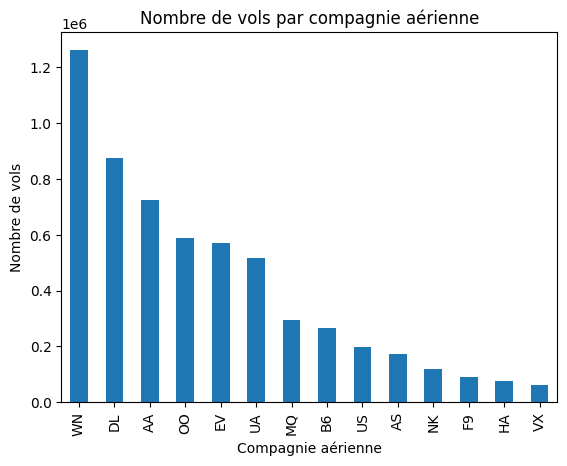

In [33]:
airline_counts = df['AIRLINE'].value_counts()
airline_counts.plot(kind='bar')
plt.title('Nombre de vols par compagnie aérienne')
plt.xlabel('Compagnie aérienne')
plt.ylabel('Nombre de vols')
plt.show()

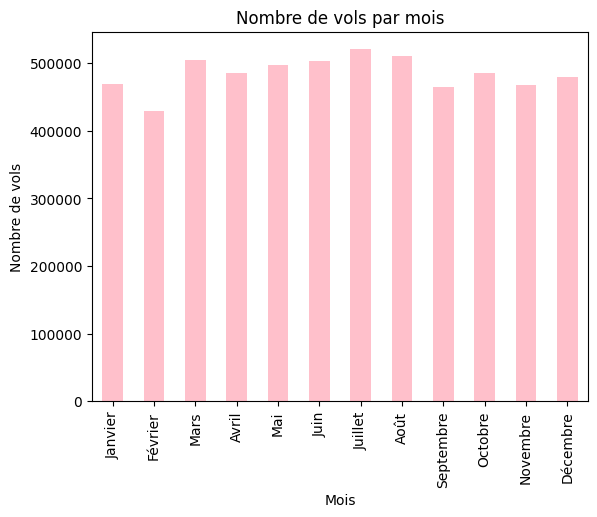

In [34]:

month_dict = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}

monthly_flights = df.groupby('MONTH').size()
monthly_flights.index = monthly_flights.index.map(month_dict)
monthly_flights.plot(kind='bar', color='pink')
plt.title('Nombre de vols par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de vols')
plt.show()

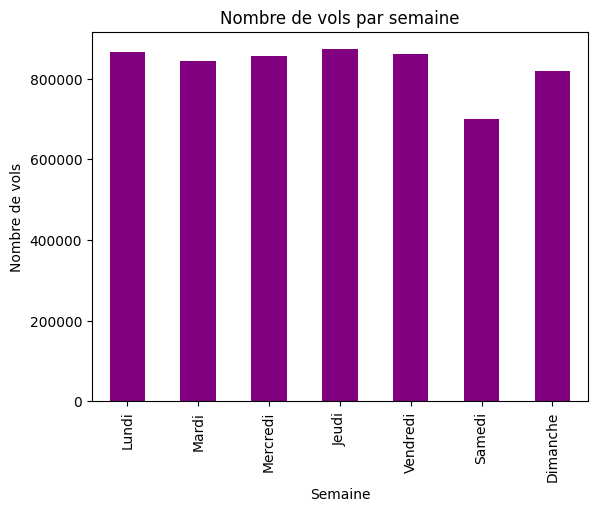

In [35]:

week_dict = {
    1: 'Lundi',
    2: 'Mardi',
    3: 'Mercredi',
    4: 'Jeudi',
    5: 'Vendredi',
    6: 'Samedi',
    7: 'Dimanche'
    
    
}

weekly_flights = df.groupby('DAY_OF_WEEK').size()
weekly_flights.index = weekly_flights.index.map(week_dict)
weekly_flights.plot(kind='bar', color='purple')
plt.title('Nombre de vols par semaine')
plt.xlabel('Semaine')
plt.ylabel('Nombre de vols')
plt.show()

### Nettoyage des  données 
on peut remarquer  qu'il y'as bcp  de valeur manquante dans le jeux de données et  pour palier a ce probleme ,  on va  supprimer les colones dont le nombre de valeurs manquantes et superieure a 50% et pour le reste , on va remplacer par la moyenne pour les données numerique et  le mode pour les données categoriel.

In [36]:
new_df = df.drop(["CANCELLATION_REASON","AIR_SYSTEM_DELAY","SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY"],axis =1)

In [37]:
data_info(new_df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5819079,0,int64,0.000000,1
MONTH,5819079,0,int64,0.000000,12
DAY,5819079,0,int64,0.000000,31
DAY_OF_WEEK,5819079,0,int64,0.000000,7
AIRLINE,5819079,0,object,0.000000,14
FLIGHT_NUMBER,5819079,0,int64,0.000000,6952
TAIL_NUMBER,5804358,14721,object,0.252978,4897
ORIGIN_AIRPORT,5819079,0,object,0.000000,930
DESTINATION_AIRPORT,5819079,0,object,0.000000,930
SCHEDULED_DEPARTURE,5819079,0,int64,0.000000,1321


In [38]:
for column in new_df.select_dtypes(include=['object']):
    new_df[column] = new_df[column].fillna(new_df[column].mode()[0])

In [39]:
for column in new_df.select_dtypes(include=['int','float']):
    new_df[column] = new_df[column].fillna(new_df[column].mean())

In [40]:
data_info(new_df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5819079,0,int64,0.0,1
MONTH,5819079,0,int64,0.0,12
DAY,5819079,0,int64,0.0,31
DAY_OF_WEEK,5819079,0,int64,0.0,7
AIRLINE,5819079,0,object,0.0,14
FLIGHT_NUMBER,5819079,0,int64,0.0,6952
TAIL_NUMBER,5819079,0,object,0.0,4897
ORIGIN_AIRPORT,5819079,0,object,0.0,930
DESTINATION_AIRPORT,5819079,0,object,0.0,930
SCHEDULED_DEPARTURE,5819079,0,int64,0.0,1321


On peut se rendre que quelque valeur comme l'année ne varie pas , et  le 'TAIL_NUMBER' "FLIGHT_NUMBER"  qui  sont là  pour identifier le voyage DonT  NOUS pouvons nous passer de ses variables

In [41]:
new_df = new_df.drop(["FLIGHT_NUMBER","TAIL_NUMBER","YEAR"],axis =1)

In [42]:
data_info(new_df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
MONTH,5819079,0,int64,0.0,12
DAY,5819079,0,int64,0.0,31
DAY_OF_WEEK,5819079,0,int64,0.0,7
AIRLINE,5819079,0,object,0.0,14
ORIGIN_AIRPORT,5819079,0,object,0.0,930
DESTINATION_AIRPORT,5819079,0,object,0.0,930
SCHEDULED_DEPARTURE,5819079,0,int64,0.0,1321
DEPARTURE_TIME,5819079,0,float64,0.0,1441
DEPARTURE_DELAY,5819079,0,float64,0.0,1218
TAXI_OUT,5819079,0,float64,0.0,185


### Transformations des données 
Nous avons les colones dont le types est "objet"  et  ces variables ne peuvent  oas etre passer a un  modeles dont nous allons transformers ces colones pour les tranformer en  valeur continue .
Pour faire cela nous allons utiliser la fonction get_dummies  qui  vas faire du  one hot enconding  et  nous allons 

In [43]:
new_df= pd.get_dummies(new_df, columns=['AIRLINE'] , dtype=int)

In [44]:
data_info(new_df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
MONTH,5819079,0,int64,0.0,12
DAY,5819079,0,int64,0.0,31
DAY_OF_WEEK,5819079,0,int64,0.0,7
ORIGIN_AIRPORT,5819079,0,object,0.0,930
DESTINATION_AIRPORT,5819079,0,object,0.0,930
SCHEDULED_DEPARTURE,5819079,0,int64,0.0,1321
DEPARTURE_TIME,5819079,0,float64,0.0,1441
DEPARTURE_DELAY,5819079,0,float64,0.0,1218
TAXI_OUT,5819079,0,float64,0.0,185
WHEELS_OFF,5819079,0,float64,0.0,1441


In [45]:
new_df['ORIGIN_AIRPORT'].unique()



array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [46]:
for column in new_df.select_dtypes(include=['object']):
    new_df[column] = new_df[column].astype('str')


   

In [47]:
label_encoder = LabelEncoder()
for column in new_df.select_dtypes(include=['object']):
    new_df[column] = label_encoder.fit_transform(new_df[column])

In [48]:
new_df.to_csv("../Data/clean_data.csv",index=False)

In [49]:
y = pd.DataFrame(np.random.uniform(200,2000,new_df.shape[0]))

In [50]:
X =new_df

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [55]:
reg_ln = LinearRegression()
reg_ln.fit(X_train, y_train)
y_pred_reg_ln = reg_ln.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_reg_ln))

MSE = 269986.2209476901


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_dt))

In [56]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb_model = xgb_model .predict(X_test)
print("MSE =", metrics.mean_squared_error(y_test, y_pred_xgb_model))

KeyboardInterrupt: 